In [7]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

In [2]:
# import
import numpy as np
import seaborn as sns # iris 데이터
import pandas as pd # 원핫인코딩
from sklearn.preprocessing import LabelEncoder # 라벨인코딩(문자 -> 숫자)
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from sklearn.model_selection import train_test_split # 데이터 분할(층화추출)
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt # 학습과정 시각화

In [ ]:
# 데이터 생성 및 전처리(라벨인코딩만, 원핫인코딩X)

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
# iris.keys()
iris_X = iris.data
iris_y = iris.target # 라벨인코딩이 되어 있음
iris_X.shape, iris_y.shape
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y,
                                                   test_size=0.1,
                                                   stratify=iris_y,
                                                   random_state=4)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((135, 4), (15, 4), (135,), (15,))

# 1. 기본적인 DNN(원핫인코딩X)

In [12]:
# model = Sequential()
# model.add(Input(4,))
# model.add(Dense(units=50, activation='relu'))
# model.add(Dense(units=30, activation='relu'))
# model.add(Dense(units=3, activation='softmax'))
model = Sequential([
    Input(4,),
    Dense(units=50, activation='relu'),
    Dense(units=30, activation='relu'),
    Dense(units=3, activation='softmax')
])
model.summary() # 250 + 1530 + 93 = 1873 개 파라미터

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                250       
                                                                 
 dense_7 (Dense)             (None, 30)                1530      
                                                                 
 dense_8 (Dense)             (None, 3)                 93        
                                                                 
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 학습설정
model.compile(loss='sparse_categorical_crossentropy', # 라벨인코딩만 되어있는 경우
              optimizer='adam',
              metrics=['accuracy'])
# 학습
earlyStopping = EarlyStopping(patience=50) # monitor='val_loss' 기본값
hist = model.fit(train_X, train_y, epochs=1000,
                 validation_split=0.2,
                 callbacks=[earlyStopping])

Epoch 1/1000
4/4 [==============================] - 1s 58ms/step - loss: 0.9909 - accuracy: 0.3519 - val_loss: 0.9719 - val_accuracy: 0.4074
Epoch 2/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.9117 - accuracy: 0.5741 - val_loss: 0.9511 - val_accuracy: 0.7037
Epoch 3/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.8862 - accuracy: 0.6481 - val_loss: 0.9034 - val_accuracy: 0.7037
Epoch 4/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.8538 - accuracy: 0.6574 - val_loss: 0.8320 - val_accuracy: 0.7037
Epoch 5/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.8180 - accuracy: 0.6574 - val_loss: 0.7774 - val_accuracy: 0.7037
Epoch 6/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.7859 - accuracy: 0.6574 - val_loss: 0.7431 - val_accuracy: 0.7037
Epoch 7/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.7544 - accuracy: 0.6574 - val_loss: 0.7205 - val_accuracy: 0.7037
Epoch 8/1000


Epoch 59/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2089 - accuracy: 0.9722 - val_loss: 0.1674 - val_accuracy: 0.9630
Epoch 60/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.2045 - accuracy: 0.9815 - val_loss: 0.1636 - val_accuracy: 1.0000
Epoch 61/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2008 - accuracy: 0.9815 - val_loss: 0.1634 - val_accuracy: 0.9630
Epoch 62/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1979 - accuracy: 0.9815 - val_loss: 0.1672 - val_accuracy: 0.9630
Epoch 63/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1930 - accuracy: 0.9815 - val_loss: 0.1563 - val_accuracy: 0.9630
Epoch 64/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1911 - accuracy: 0.9815 - val_loss: 0.1500 - val_accuracy: 1.0000
Epoch 65/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1862 - accuracy: 0.9815 - val_loss: 0.1524 - val_accuracy: 0.9630
Epoch 

4/4 [==============================] - 0s 12ms/step - loss: 0.0713 - accuracy: 0.9907 - val_loss: 0.0722 - val_accuracy: 0.9630
Epoch 174/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0700 - accuracy: 0.9907 - val_loss: 0.0718 - val_accuracy: 0.9259
Epoch 175/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0712 - accuracy: 0.9907 - val_loss: 0.0725 - val_accuracy: 0.9630
Epoch 176/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0678 - accuracy: 0.9907 - val_loss: 0.0720 - val_accuracy: 0.9259
Epoch 177/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0700 - accuracy: 0.9907 - val_loss: 0.0717 - val_accuracy: 0.9259
Epoch 178/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0695 - accuracy: 0.9907 - val_loss: 0.0716 - val_accuracy: 0.9259
Epoch 179/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0750 - accuracy: 0.9815 - val_loss: 0.0739 - val_accuracy: 0.9630
Epoch 180/1000

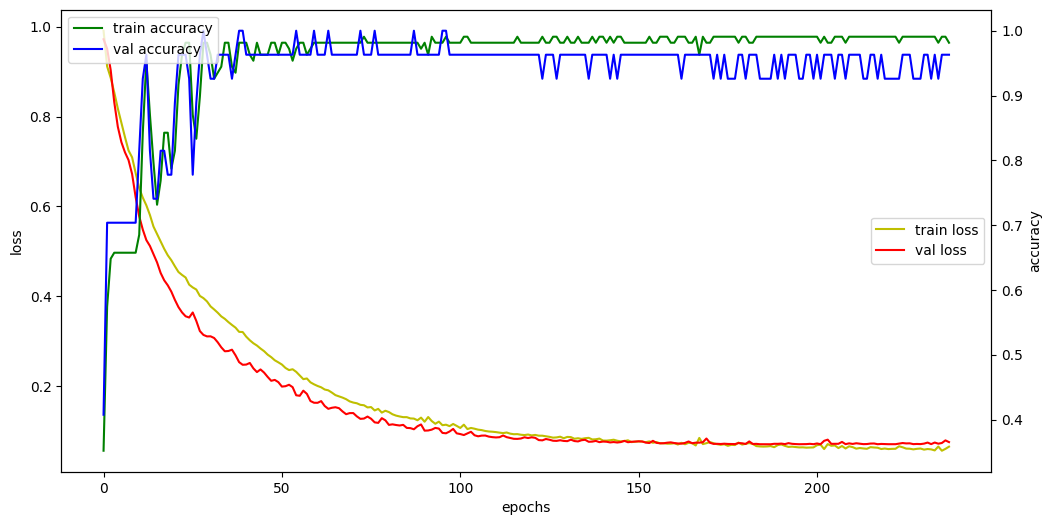

In [14]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(loc='upper left')
plt.show()

# 2. sklearn 이용
- 원핫인코딩 하지 않고 라벨인코딩까지만 해야 작동, numpy 배열

In [15]:
from sklearn.neural_network import MLPClassifier

In [18]:
# 머신러닝 교안 3장 p43 참조
mlp_model = MLPClassifier(hidden_layer_sizes=(50,30),
                      activation='relu',
                      solver='adam',
                      alpha=0.0001, # 과적합 방지 강도
                      batch_size=40,
                      max_iter=1000, # epochs
                      early_stopping=True, # 조기종료 활성화
                      n_iter_no_change=50, # patience
                      validation_fraction=0.1, # 검증셋 비율
                      warm_start=False) # True일 경우 이전 학습에 이어 학습

In [19]:
mlp_model.fit(train_X, train_y)

MLPClassifier(batch_size=40, early_stopping=True, hidden_layer_sizes=(50, 30),
              max_iter=1000, n_iter_no_change=50)

In [23]:
# 모델 평가 : accuracy(test_X, test_y), recall, precision(test_y, yhat)
from sklearn.metrics import recall_score, precision_score
accuracy = mlp_model.score(test_X, test_y)
yhat = mlp_model.predict(test_X)
recall = recall_score(test_y, yhat, average='weighted')
precision = precision_score(test_y, yhat, average='weighted')
print("정확도 : ", accuracy)
print("재현율 : ", recall)
print("정밀도 : ", precision)
print("교차표\n", pd.crosstab(test_y, yhat,
                             rownames=['실제'],
                             colnames=['예측']))

정확도 :  0.8666666666666667
재현율 :  0.8666666666666667
정밀도 :  0.8666666666666667
교차표
 예측  0  1  2
실제         
0   5  0  0
1   0  4  1
2   0  1  4


# 3. 클래스 이용

In [24]:
class DNNClassifier :
    @staticmethod
    def build(input_dim=4, activation='relu', optimizer='adam') :
#         모델 구성
#         model = Sequential()
#         model.add(Input(input_dim,))
#         model.add(Dense(50, activation=activation))
#         model.add(Dense(30, activation=activation))
#         model.add(Dense(3, activation='softmax'))
        model = Sequential([
            Input(input_dim,),
            Dense(50, activation=activation),
            Dense(30, activation=activation),
            Dense(3, activation='softmax')
        ])
        # 모델 학습 설정
        model.compile(loss='sparse_categorical_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy']
                      )
        return model 

In [27]:
%%time
# 모델
model = DNNClassifier.build(input_dim=4, activation='relu')
model.summary()
# 학습
hist = model.fit(train_X, train_y,
                 epochs=500,
                 validation_split=0.2,
                 verbose=0)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 50)                250       
                                                                 
 dense_16 (Dense)            (None, 30)                1530      
                                                                 
 dense_17 (Dense)            (None, 3)                 93        
                                                                 
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________
CPU times: total: 19 s
Wall time: 14.9 s


In [28]:
loss, acc = model.evaluate(test_X, test_y)
loss, acc

1/1 [==============================] - 0s 33ms/step - loss: 0.0467 - accuracy: 1.0000


(0.04674331471323967, 1.0)

# 4. 함수형 API 이용
- 병렬처리 : 속도 향상
- 레지듀얼블록(Residual block) : 모델 성능 향상(자연어처리, 이미지처리)

In [8]:
# import
import numpy as np
from sklearn.model_selection import train_test_split # 데이터 분할(층화추출)
from tensorflow.keras import Model # 모델 생성(입력층과 출력층 이용)
from tensorflow.keras.layers import Dense, Input, add # 레지듀얼블럭에서 add 이용
from tensorflow.keras.layers import concatenate # 병렬처리

In [9]:
from sklearn import datasets
iris = datasets.load_iris()
# iris.keys()
iris_X = iris.data
iris_y = iris.target # 라벨인코딩이 되어 있음
iris_X.shape, iris_y.shape
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y,
                                                   test_size=0.1,
                                                   stratify=iris_y,
                                                   random_state=4)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((135, 4), (15, 4), (135,), (15,))

In [6]:
# 기존의 model 스타일 4 -> 50 -> 30 -> 3
input_ = Input(shape=(4,))
dense1 = Dense(units=50, activation='relu')(input_)
dense2 = Dense(units=30, activation='relu')(dense1)
dense3 = Dense(units=3, activation='softmax')(dense2)
model = Model(inputs=input_, outputs=dense3)
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(train_X, train_y, epochs=20,
          validation_split=0.2)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 50)                250       
                                                                 
 dense_7 (Dense)             (None, 30)                1530      
                                                                 
 dense_8 (Dense)             (None, 3)                 93        
                                                                 
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
4/4 [==============================] - 1s 112ms/step - loss: 1.8452 - accuracy: 0.2963 - val_loss: 1.4285 - val_accuracy: 0.4815
Epoch 2/20
4/4 [==============================] -

In [11]:
# 병렬처리
# 4 -> 160(50, 80, 30으로 병렬처리) -> 32 -> 3
input_ = Input(shape=(4,))
dense1 = Dense(units=50, activation='relu')(input_)
dense2 = Dense(units=80, activation='relu')(input_)
dense3 = Dense(units=30, activation='relu')(input_)
# x = Dense(160, activation='relu')(input_)의 병렬처리
x = concatenate([dense1, dense2, dense3])
dense4 = Dense(32, activation='relu')(x)
output = Dense(3, activation='softmax')(dense4)
model = Model(inputs=input_, outputs=output)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense_14 (Dense)               (None, 50)           250         ['input_5[0][0]']                
                                                                                                  
 dense_15 (Dense)               (None, 80)           400         ['input_5[0][0]']                
                                                                                                  
 dense_16 (Dense)               (None, 30)           150         ['input_5[0][0]']                
                                                                                            

In [14]:
%%time
# 레지듀얼블록(Residual Block) : 딥러닝에서 딥한 네트워크가 학습이 잘 되지 않을 경우 이용
# 4 -> 50 -> 50 ->(레지듀얼) -> 3
input_ = Input(shape=(4,))
dense1 = Dense(50, activation='relu')(input_)
dense2 = Dense(50, activation='relu')(dense1)
dense3 = add([dense1, dense2])
output = Dense(3, activation='softmax')(dense3)
model = Model(inputs=input_, outputs=output)
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(train_X, train_y, epochs=500,
          validation_split=0.2, verbose=0)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense_25 (Dense)               (None, 50)           250         ['input_8[0][0]']                
                                                                                                  
 dense_26 (Dense)               (None, 50)           2550        ['dense_25[0][0]']               
                                                                                                  
 add_2 (Add)                    (None, 50)           0           ['dense_25[0][0]',               
                                                                  'dense_26[0][0]']         